# Time Series class

In [37]:
library(tseries)
library(lmtest)
library(astsa)
library(forecast)

# Part 1 $$Dynamic\space models$$



$$y_t=a_0+\beta_1x_t+\beta_2y_{t-1}+\epsilon_t$$


An increase of 1 unit in the independent variable $x_j$ in time period t (all other variables held fixed), will lead to an expected increase in the dependent variable of

$$\beta_j\text{ in period t} $$
$$\beta_j  \gamma \text{ in period }(t+1)$$
$$\beta_j \gamma^2 \text{ in period }(t+2)$$
$$\beta_j \gamma^3 \text{ in period }(t+3)\text{    and so on}$$


The total expected increase over all current and future time periods is $\beta_j/(1-\gamma)$
The coefficients $\beta_0, \beta_1, . . . ,\beta_K, \gamma$ are estimated by least squares in the usual manner


Example:   $ \hat{y}=-43.8+0.0188sales_t + 0.479y_{t-1}$


Y – advertising expenditure per household in year t

Sales – retail sales per household in year t

If retail sales per household increase by $1 in the current year, then the expected effect on advertising is an increase of 0.0188.

In the next year: $0.479*0.0188=0.009$

In two years: $(0.479^2) * 0.0188=0.0043 $


# Exercise 1

Descripton:

Read in adv_sales.csv

In [2]:
data = read.csv('adv_sales.csv', sep=',', dec=".")
data

X,adv,sales,adv_1
2,115.62,5540,117.66
3,110.79,5305,115.62
4,119.22,5507,110.79
5,120.78,5418,119.22
6,110.20,5320,120.78
7,110.86,5538,110.20
8,114.06,5692,110.86
9,120.87,5871,114.06
10,127.03,6157,120.87
11,132.08,6342,127.03


In [3]:
adv=data$adv
sales=data$sales
adv_1=data$adv_1
adv
sales
adv_1

[1] 115.62 110.79 119.22 120.78 110.20 110.86 114.06 120.87 127.03 132.08
[11] 132.27 134.69 138.62 136.15 144.17 154.03 161.39 157.72 145.37 152.73
[21] 155.70

[1] 5540 5305 5507 5418 5320 5538 5692 5871 6157 6342 5907 6124 6186 6224 6496
[16] 6718 6921 6471 6394 6555 6755

[1] 117.66 115.62 110.79 119.22 120.78 110.20 110.86 114.06 120.87 127.03
[11] 132.08 132.27 134.69 138.62 136.15 144.17 154.03 161.39 157.72 145.37
[21] 152.73

In [4]:
model1<-lm(adv ~ sales+adv_1)
summary(model1)


Call:
lm(formula = adv ~ sales + adv_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4833 -2.1631 -0.2472  1.8442  6.5043 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43.765719   9.842613  -4.447 0.000312 ***
sales         0.018777   0.002855   6.578 3.53e-06 ***
adv_1         0.479056   0.087319   5.486 3.28e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.451 on 18 degrees of freedom
Multiple R-squared:  0.9629,	Adjusted R-squared:  0.9588 
F-statistic: 233.4 on 2 and 18 DF,  p-value: 1.339e-13


# Part 2 $$Stationarity$$

A time series is covariance stationary when:

It exhibits mean reversion – it fluctuates around a constant long-run mean

![stationary time series](image2.png)

Has a finite variance that is time-invariant

Has a theoretical correlogram that diminishes as the lag length increases. 


Stationarity is important because, if the series is non-stationary, all the typical results of the classical regression analysis are not valid. 

Regressions with non-stationary series may have no meaning and are therefore called “spurious”. 

Shocks to a stationary time series are temporary, over time the effects of the shocks will disappear and the series will revert to its long-run mean level. 

A such, long-term forecasts of a stationary series will converge to the unconditional mean of the series. 


$$Y_t=\gamma Y_{t-1}+v_t$$


This is an example of an $AR(1)$ model – the lagged dependent variable is used as an explanatory variable and the lag is = 1. 


$|\gamma| < 1  Y_t $ stationary – the expected value of $Y_t$ will eventually approach 0 (the error term is a classical error term with expected value 0)

$ | \gamma | > 1  Y_t $ nonstationary – the series is explosive, the $Y_t$ keeps on increasing as the sample size grows

$ | \gamma | = 1 Y_t  $ nonstationary - random walk, does not converge to any value => unit root 

If a variable has a unit root then it is not stationary and follows random walk; 
word is often used interchangeably nonstationary = unit root


We need to test whether series is stationary or not – we use Dickey-Fuller test (which can have 3 versions, without constant, with a constant and with a trend). 

$H_0: 1=0$				unit root, nonstationary series

$H_1: 1<0$				stationary series

$Beta_1$ in the $H_0$ corresponds to the $Beta_1$ from equations below $(1^{st}, 2^{nd}, or 3^{rd} version).$


$$Y_t=\gamma Y_{t-1}+v_t$$

$$Y_t-Y_{t-1}=(\gamma-1)Y{t-1}+v_t$$



$∆Y_t=\beta_1Yt-1+vt\qquad\qquad\quad\: 1^{st} version$

$∆Y_t=\beta_0+\beta_1Y_{t-1}+vt\qquad \quad \:\:			2^{nd}\text{ version with an intercept}$

$∆Y_t=\beta_0+\beta_1Y_{t-1}+\beta_2t+v_t\qquad 		3^{rd}\text{ version with trend}$


Test uses t-test and special critical tables, below there is code how to perform it in $R$. 
Test below is for a Augmented-Dickey-Fuller test that takes into account potential autocorrelation of the errors and adds a series of lagged $∆Y_t$ into the tested model. 


# Exercise 2

#### <span style="color:green">Check the stationarity of the advertising series and retail sales series from the first example. </span>


In [5]:
adv_ts=ts(adv)
adf.test(adv_ts)


	Augmented Dickey-Fuller Test

data:  adv_ts
Dickey-Fuller = -3.0968, Lag order = 2, p-value = 0.1545
alternative hypothesis: stationary


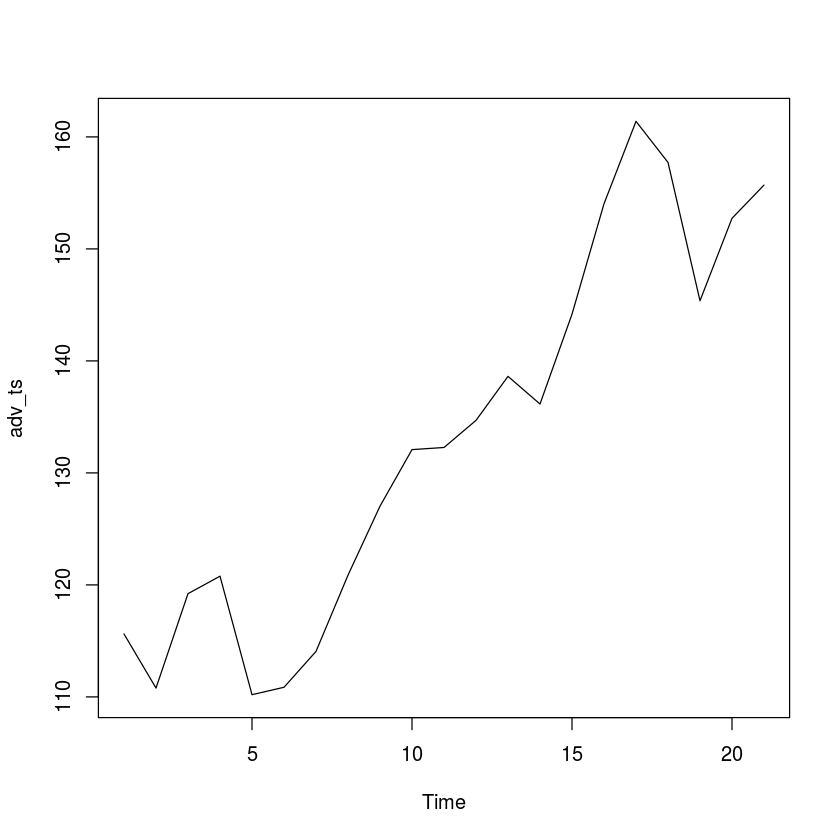

In [6]:
plot(adv_ts)

# Part 3 $$Granger\: Causality $$

* How are 2 variables related? Is y causing x or is x causing y? 
* Chicken and egg problem
* Granger causality: When one time-series variable consistently and predictably changes before another variable.
* It allows to distinguish which variable precedes or “leads” the other variable


To see if A Granger-caused Y, you should run:

$y_t=\beta_0+\beta_1y_{t-1}{..}\beta_py_{t-p}+\alpha_1A_{t-1}+{...}\alpha_pA_{t-1}+\epsilon_t$ **(eq1)**

$H_0: \alpha_1=\alpha_2=…=\alpha_p=0$

$H_1$ at least one $\alpha_i$ for $i = 1,…,p$ is different from 0

If we can reject this null hypothesis using an F-test, then we have evidence that A Granger-causes Y


We need to test the ”other direction” too.

$A_t=\beta_0+\beta_1A_{t-1}+…+\beta_pA+\alpha_1y_{t-1}+…+\alpha_py_{t-p}+\epsilon_t$  **(eq2)**

We test 

$H_0: \alpha_1=\alpha_2=…=\alpha_p=0$

$H_1$ at least one $\alpha_i$ for $i = 1,…,p$ is different from 0.

If the test is significant for **eq1** but not for **eq2**, then we can conclude that A Granger-causes Y. 


# Exercise 3

#### <span style="color:green">Read in chic and egg data and make them time series format</span>


In [7]:
Chic_egg = read.csv('chic_egg.csv', sep=';', dec=".")
#Chic_egg
chic=Chic_egg$chic
egg=Chic_egg$egg
chic
egg

[1] 468491 449743 436815 444523 433937 389958 403446 423921 389624 418591
[11] 438288 422841 476935 542047 582197 516497 523227 467217 499644 430876
[21] 456549 430988 426555 398156 396776 390708 383690 391363 374281 387002
[31] 369484 366082 377392 375575 382262 394118 393019 428746 425158 422096
[41] 433280 421763 404191 408769 394101 379754 378361 386518 396933 400585
[51] 392110 384838 378609 364584 374000 370000 373000 380000 356000 356000
[61] 353000 363000 371000 380000 386000 388000 393000 410000 425000 437000
[71] 437000 444000 444000 450000 454000 453000 453000

[1] 3581 3532 3327 3255 3156 3081 3166 3443 3424 3561 3640 3840 4456 5000 5366
[16] 5154 5130 5077 5032 5148 5404 5322 5323 5307 5402 5407 5500 5442 5442 5542
[31] 5339 5358 5403 5345 5435 5474 5540 5836 5777 5629 5704 5806 5742 5502 5461
[46] 5382 5377 5408 5608 5777 5825 5625 5800 5656 5683 5700 5758 5867 5808 5600
[61] 5675 5750 5892 5992 6158 6233 6367 6458 6650 6908 7058 7175 7275 7292 7425
[76] 7500 7575

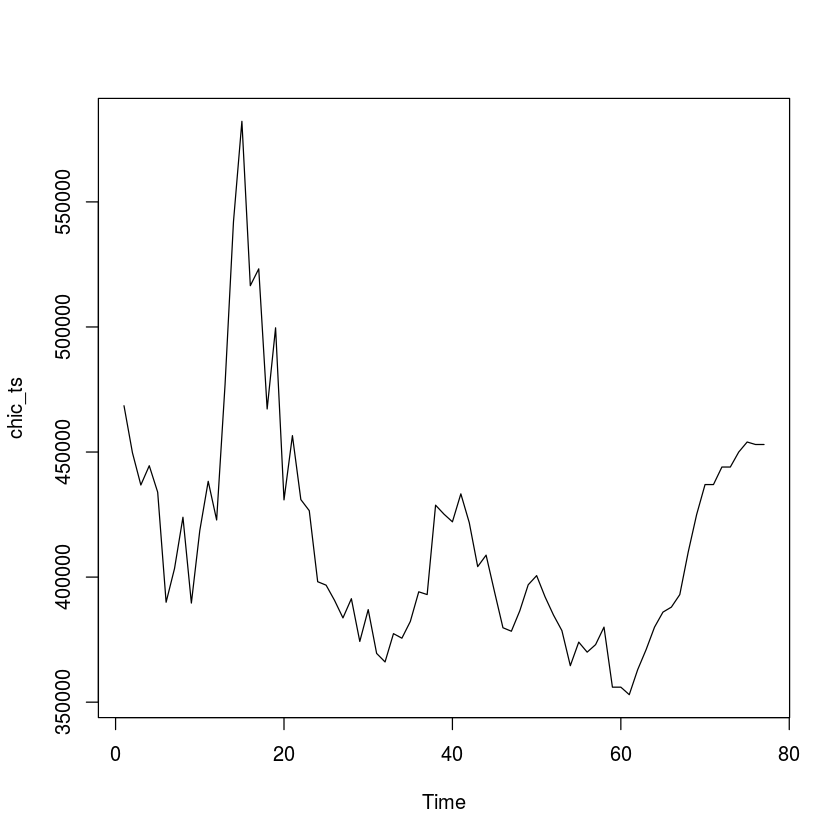

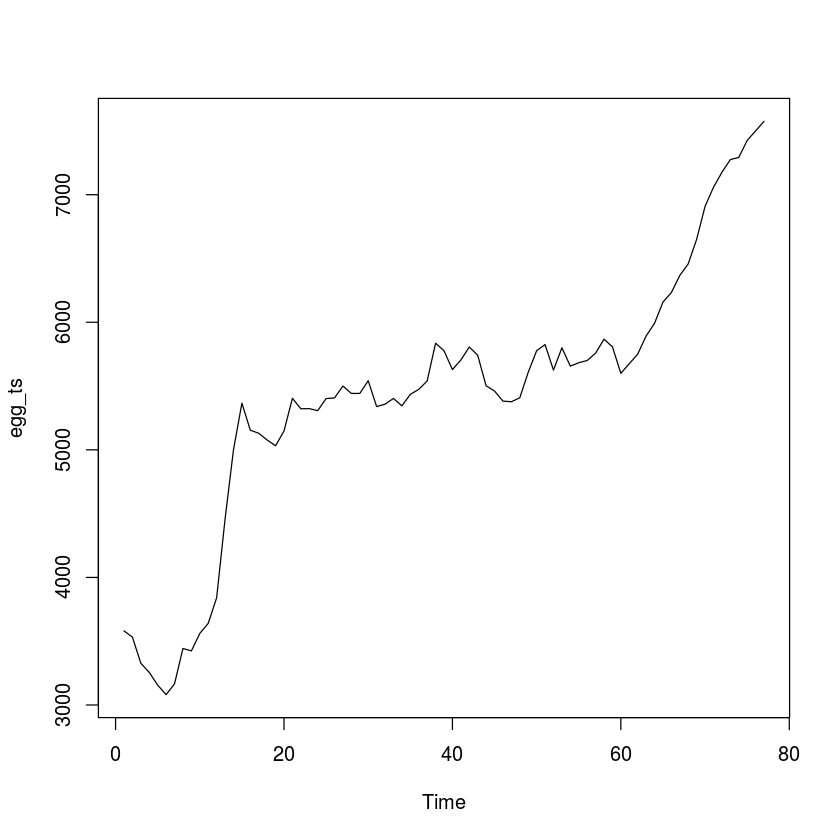

In [8]:
chic_ts=ts(chic) # Here you take column called chic from chic_egg and save it as chic time series
egg_ts=ts(egg) # Similar as above but for egg
plot(chic_ts) #are these series stationary
plot(egg_ts) #are these series stationary


In [9]:
adf.test(chic_ts)
adf.test(egg_ts)


	Augmented Dickey-Fuller Test

data:  chic_ts
Dickey-Fuller = -2.8286, Lag order = 4, p-value = 0.2371
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  egg_ts
Dickey-Fuller = -2.3088, Lag order = 4, p-value = 0.4494
alternative hypothesis: stationary


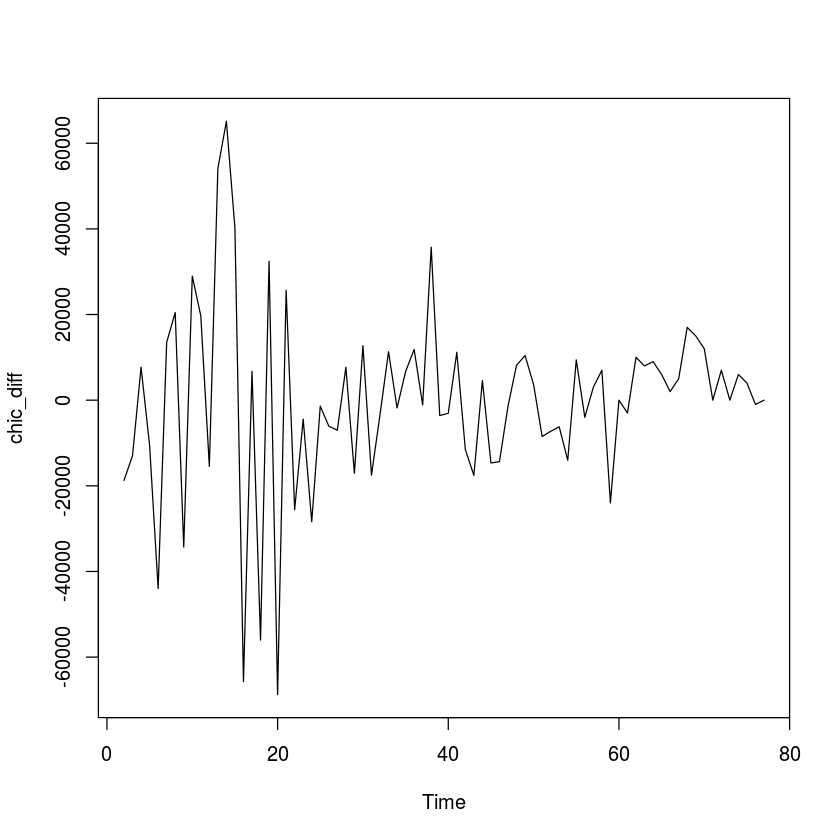


	Augmented Dickey-Fuller Test

data:  egg_diff
Dickey-Fuller = -3.699, Lag order = 4, p-value = 0.03069
alternative hypothesis: stationary


Warning message in adf.test(chic_diff):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  chic_diff
Dickey-Fuller = -4.1023, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


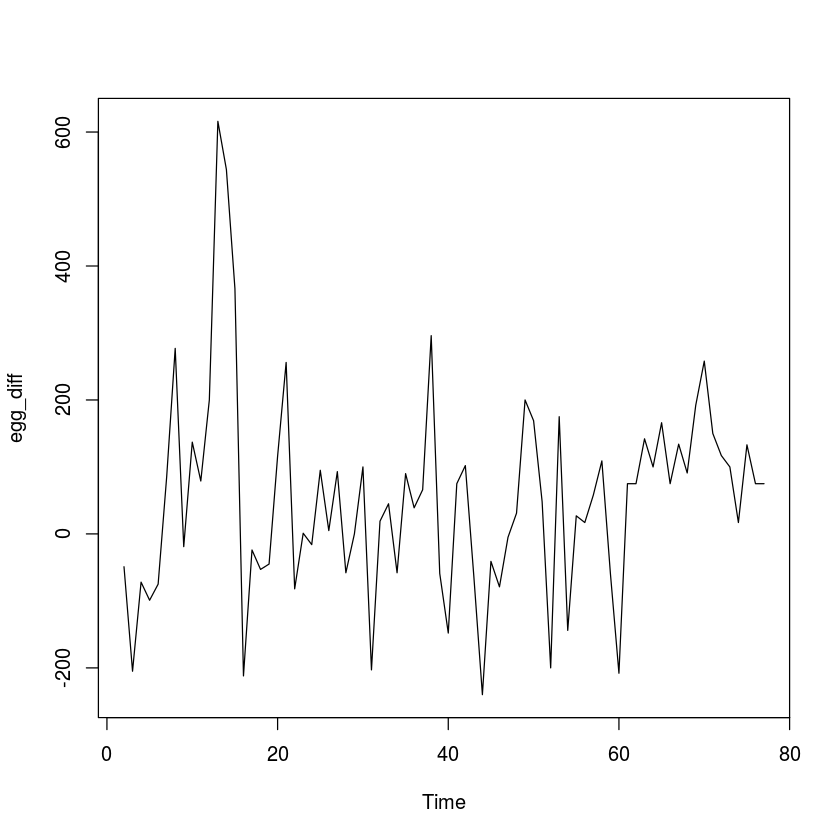

In [10]:
chic_diff=diff(chic_ts,1) #creates first difference
egg_diff=diff(egg_ts,1) #creates first difference
plot(chic_diff)
plot(egg_diff)
adf.test(egg_diff) #are these series stationary
adf.test(chic_diff) #are these series stationary



## Granger test

Model 1: chic_diff ~ Lags(chic_diff, 1:3) + Lags(egg_diff, 1:3)

Model 2: chic_diff ~ Lags(chic_diff, 1:3)


In [11]:
grangertest(chic_diff~egg_diff, order=3) #granger test with 3 lags


Res.Df,Df,F,Pr(>F)
66,NA,NA,NA
69,-3,3.536744,0.01932781


The model that you test: 

In code:
> chic_diff=constant+chic_diff_t-1+chic_diff_t-2+chic_diff_t-3+egg_diff_t-1+egg_diff_t-2+egg_diff_t-3

In math:
> $∆chic=constant+∆chic_t-1+∆chic_{t-2}+∆chic_{t-3}+∆egg_{t-1}+∆egg_{t-2}+∆egg_{t-3}$

The df of residuals for this model are $n-k-1=76-6-1=69$

The df of restricted model are $m=3$

#### <span style="color:red"> Eggs are granger causing chickens</span>


### Now we need to run the test the other way

Model 1: egg_diff ~ Lags(egg_diff, 1:3) + Lags(chic_diff, 1:3)

Model 2: egg_diff ~ Lags(egg_diff, 1:3)


#### <span style="color:red"> We cannot reject the null chicks are not granger causing eggs</span>


In [12]:
grangertest(egg_diff~chic_diff, order= 3) 


Res.Df,Df,F,Pr(>F)
66,NA,NA,NA
69,-3,0.1048572,0.9569561


# Part 4 $$ARIMA$$

Box and Jenkins (1976) first introduced ARIMA models, the term deriving from:

AR – autoregressive

I – integrated

MA – moving average. 


## $$AR model$$

A first-order autoregression, denoted $AR(1)$, satisfies the following equation:

$$Y_t=c+ϕY_{t-1}+\epsilon_t$$

where $\epsilon_t$ is a white noise. 
In case $|ϕ|≥1,\: Y_t$ is not a stationary process. 


An extension/generalisation of that model is an $AR(p)$ model:

$$Y_t=c+ϕ_1Y_{t-1}+ϕ_2Y_{t-2}+ϕ_3Y_{t-3}+…+pY_{t-p}+\epsilon_t$$

This is an Autoregressive process of order p.


## $$MA model$$
A first-order moving average $MA(1)$ model is given by:

$$Y_t=μ+\epsilon_t+\theta_1\epsilon_{t-1}$$
where $\epsilon_t$ is a white noise
an extension of that model $MA(q)$ is given by:

$$Y_t=μ+\epsilon_t+\theta_1 \epsilon_{t-1} + {...}+\theta_q\epsilon_{t-q}$$

This is a Moving Average model of order q.


## $$ARMA model$$

The process $Y_t$ given by:

$$c+Y_t+\varphi_1Y_{t-1}+{...}+\varphi_pY_{t-p}=μ+\epsilon_t+\theta_1\epsilon_{t-1}+{…}+\theta_q\epsilon_{t-q},$$
where $\epsilon_t$ is white noise is called and $ARMA(p,q)$ process.


## $$ARIMA model$$

$ARIMA(p,d,q)$ model is an $ARMA(p,q)$ model for differenced data $d=1$ (first differences)



## $$ACF$$

After we have chosen d (if the initial process was not stationary), we need to identify values of p and q. We do it based on the autocorrelation and partial autocorrelation functions ($ACF$ and $PACF$). 

The $ACF$ of the series gives correlations between xt and $xt-h$ for $h = 1, 2, 3,$ etc.


## $$PACF$$

In general, a partial correlation is a conditional correlation. It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables. For a time series, the partial autocorrelation between $x_t$ and $x_{t-h}$ is defined as the conditional correlation between  $x_t$ and $x_{t-h}$, conditional on $x_{t-h+1}, {...} , x_{t-1}$, the set of observations that come between the time points $t$ and $t−h$.
A partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags. The autocorrelation of a time series $Y$ at lag 1 is the coefficient of correlation between $Y_t$ and $Y_{t-1}$, which is presumably also the correlation between $Y_{t-1}$ and $Y_{t-2}$. But if $Y_t$ is correlated with $Y_{t-1}$, and $Y_{t-1}$ is equally correlated with $Y_{t-2}$, then we should also expect to find correlation between Yt and Yt-2. In fact, the amount of correlation we should expect at lag 2 is precisely the square of the lag-1 correlation. Thus, the correlation at lag 1 "propagates" to lag 2 and presumably to higher-order lags. The partial autocorrelation at lag 2 is therefore the difference between the actual correlation at lag 2 and the expected correlation due to the propagation of correlation at lag 1.


### $$ Identification \:of\: the \:ARMA \:model $$


|  $ $  | $ACF$ | $PACF$ |
|----------|-------------------------------------------|------------------------|
|$AR(p)$|Damped exponential and/or sine functions|$PACF =0 for  k>p $
|$MA(q)$|$ACF = 0\: for\:  k>p $ | Dominated by damped exponential and/or sine functions 
| $ARMA(p,q)$ | Damped exponential and/or since functions after $lag\: q-p$ | Dominated by damped exponential and/or sine functions after $ lag\: p-q$  |




Examples:
![](arima_image.png)

In order to compare the models, one can use AIC (Akaike’s Information Criteria) or BIC (Schwarz Bayesian Information Criterion) information criteria. 



$$AIC=(\dfrac{{RSS}}{n})e^{2k/n}$$

where RSS = Residual Sum of Squares

k – number of parameters

n – number of observations


$$BIC=(\dfrac{RSS}{n})e^{k/n}$$

There are also many others. Ideally, one selects the model that minimizes all those statistics. In general, however, it is quite common to have contradictory results arising from different criteria. 

The AIC is the most commonly used method in time series analysis. There is no need to calculate them by hand, they are part of typical statistical output. 


Model checking

Residual analysis: The general assumption regarding ARMA process is that {t} is white noise. Thus, if a model is adequate, we have to require that the model errors are white noise.
One way to check this is to plot the residuals. Such a plot can reveal non-stationarities and outliers.
Also, one can plot ACF function for residuals and see whether individual autocorrelation values are significantly different from zero or whether they are constrained in a 95% confidence interval. 



The Bok-Jenkins approach step by step for choosing ARIMA model:

Step 1: Calculate ACF and PACF of the raw data, and check whether the series is stationary or not. If the series is stationary go to Step 3; if not go to step 2.

Step 2: Take first differences of the raw data and calculate the ACF and PACF for the differenced series.

Step 3: Examine the graphs of the ACF and PACF and determine which models would be a good starting point.

Step 4: Estimate those models.

Step 5: For each of the estimated models:

1. Check to see if the parameter of the longest lag is significant. If not, there are probably too many parameters and you should decrease the order of p and/or q.
2. Check the ACF and PACF of the errors. If the model has at least enough parameters, then all error ACFs and PACFs will be insignificant.
3. Check AIC – choose the model that minimizes AIC. 


## $$Useful\: R \:code$$
Exercise 5

What to do?
1. Read in the data
2. Plot the data
3. Figure out what type of ARIMA process it is
4. Probably several potential models – estimate them and check which one is the best
5. Try out R suggestion for the best model


### Bike count example
### Open ARMA_models.R script


In [13]:
library(readxl)


In [14]:
bike_count <- read.csv("bike_count.csv") #here you need to give proper access path or use Import Dataset function in RStudi

In [15]:
head(bike_count, n=10)

cnt
985
801
1349
1562
1600
1606
1510
959
822
1321


In [16]:
bike_ts = ts(bike_count) #this creates a time series that R can recognize 


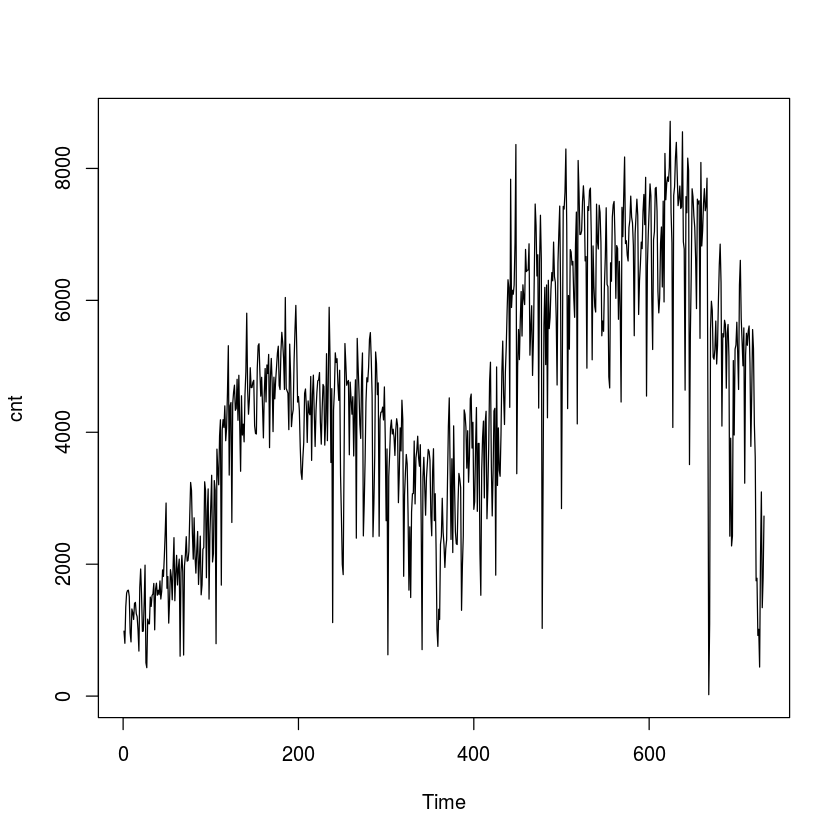

In [17]:
plot(bike_ts) #this plots you time series called "cnt" ; you can see it below Fig1.


In [18]:
summary(bike_ts) #summary stat of the series, min, max value, mean median and 1st and 3rd quartile

      cnt      
 Min.   :  22  
 1st Qu.:3152  
 Median :4548  
 Mean   :4504  
 3rd Qu.:5956  
 Max.   :8714  

In [19]:
adf.test(bike_ts) #we want to check whether our series is stationary


	Augmented Dickey-Fuller Test

data:  bike_ts
Dickey-Fuller = -1.6351, Lag order = 9, p-value = 0.7327
alternative hypothesis: stationary


p-value is big we fail to reject the null hypothesis of no stationarity.

Our series is not stationary, we want to create first differences. 



In [20]:
bike_ts_diff=diff(bike_ts,1) #creates first difference

In [21]:
bike_ts_diff_lag=lag(bike_ts_diff,-1) 

In [22]:
bike_variable=cbind(bike_ts_diff,bike_ts_diff_lag) 

In [23]:
bike_fit = lm(bike_variable[,1]~bike_variable[,2])

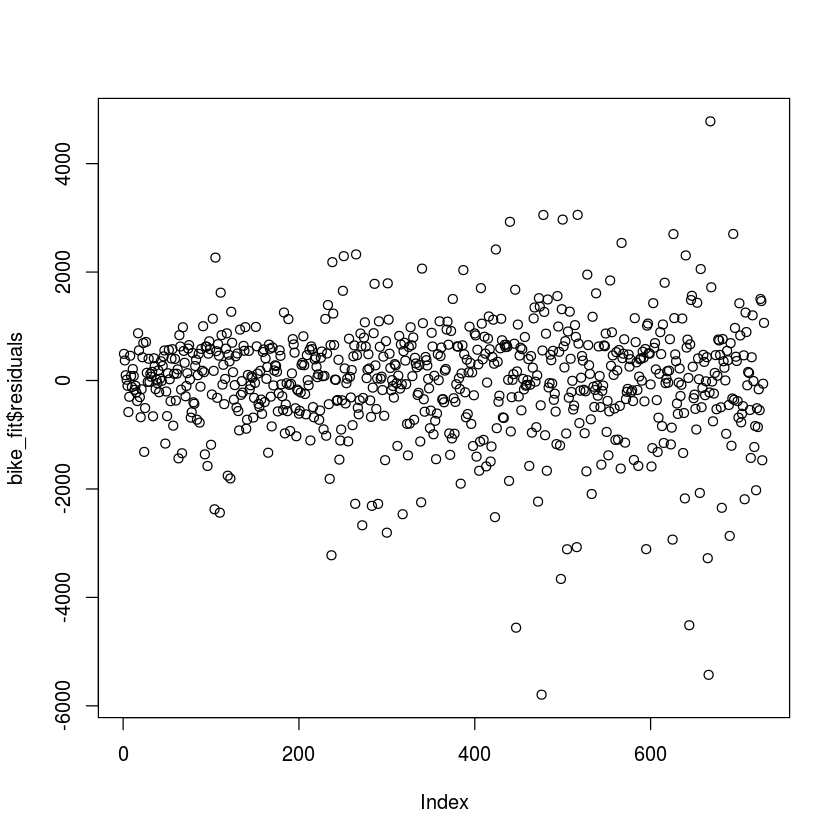

In [24]:
plot(bike_fit$residuals) #graph of the residuals of the model



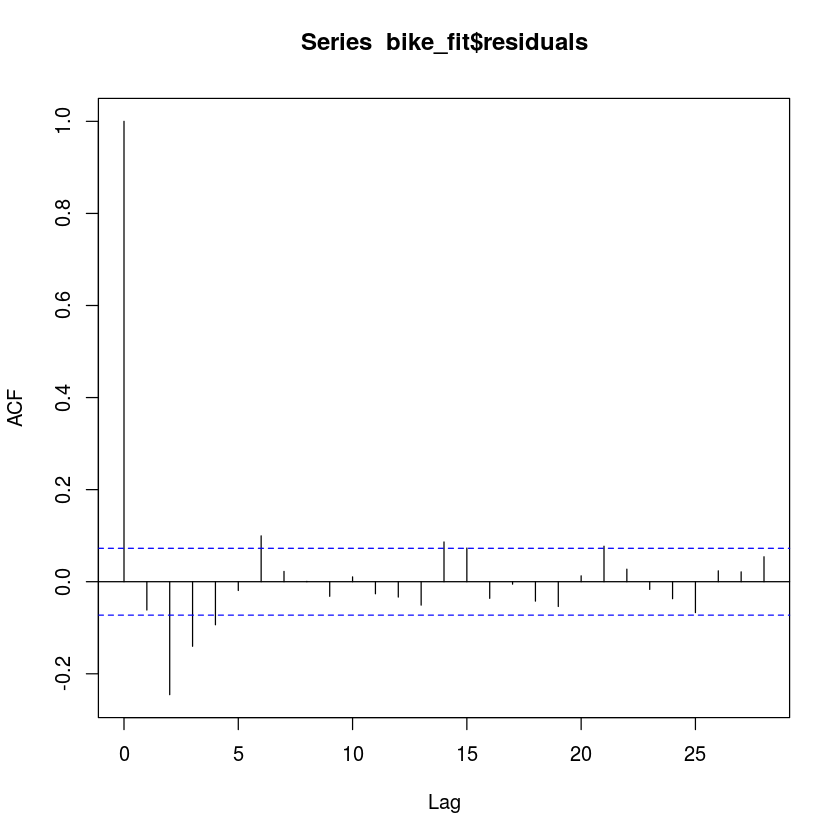

In [25]:
acf(bike_fit$residuals) #acf function for residuals

This is ACF for our residuals, it is not perfect still some autocorrelations that are significant. 
We should check another model, for this we will have a look at the ACF and PACF graphs of the stationary model of bike counts (differenced series). 


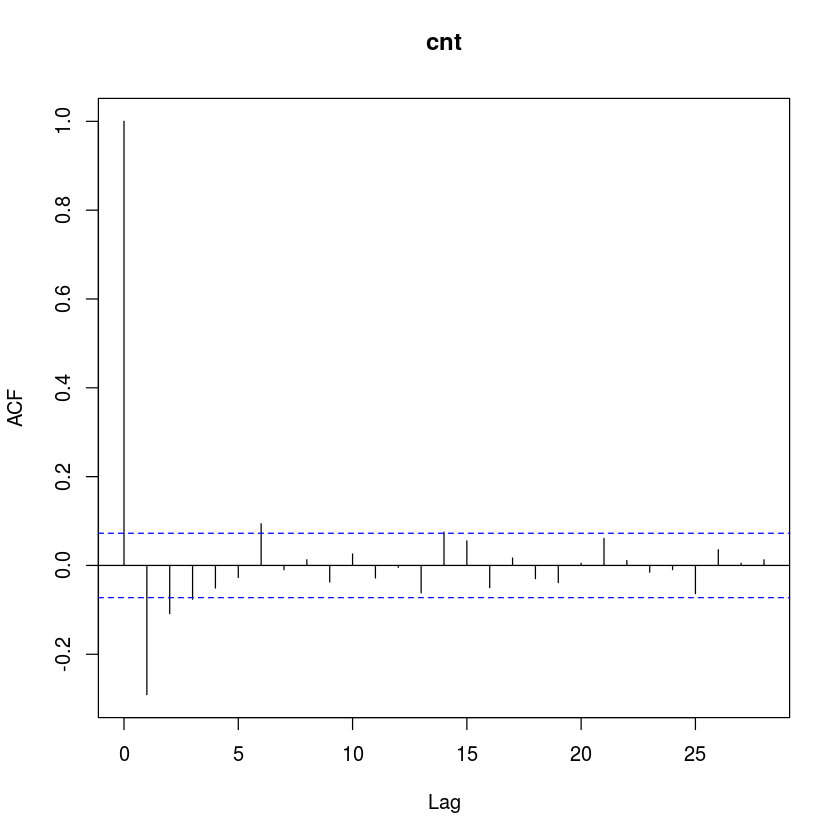

In [26]:
acf(bike_ts_diff) #plots ACF 



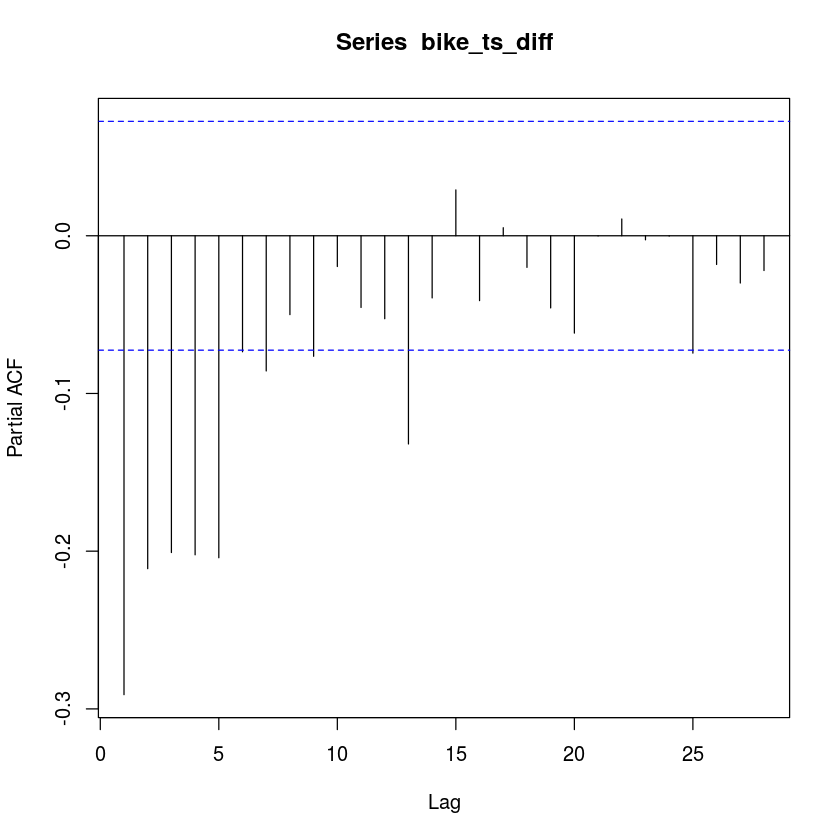

In [27]:
pacf(bike_ts_diff) #plots PACF

How could we check MA(5)?


initial  value 6.970284 
iter   2 value 6.871985
iter   3 value 6.843427
iter   4 value 6.834373
iter   5 value 6.830572
iter   6 value 6.829175
iter   7 value 6.827999
iter   8 value 6.827573
iter   9 value 6.827502
iter  10 value 6.827496
iter  11 value 6.827495
iter  12 value 6.827494
iter  12 value 6.827494
iter  12 value 6.827494
final  value 6.827494 
converged
initial  value 6.828063 
iter   2 value 6.828062
iter   3 value 6.828062
iter   4 value 6.828061
iter   5 value 6.828061
iter   5 value 6.828061
iter   5 value 6.828061
final  value 6.828061 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = xmean, include.mean = FALSE, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
          ma1      ma2      ma3      ma4     ma5   xmean
      -0.5275  -0.2006  -0.1022  -0.0292  0.0393  1.9051
s.e.   0.0373   0.0428   0.0389   0.0423  0.0353  6.2031

sigma^2 estimated as 851538:  log likelihood = -6020.31,  aic = 12054.62

$degrees_of_freedom
[1] 724

$ttable
      Estimate     SE  t.value p.value
ma1    -0.5275 0.0373 -14.1252  0.0000
ma2    -0.2006 0.0428  -4.6846  0.0000
ma3    -0.1022 0.0389  -2.6272  0.0088
ma4    -0.0292 0.0423  -0.6900  0.4904
ma5     0.0393 0.0353   1.1122  0.2664
xmean   1.9051 6.2031   0.3071  0.7588

$AIC
[1] 14.67124

$AICc
[1] 14.67419

$BIC
[1] 13.70899


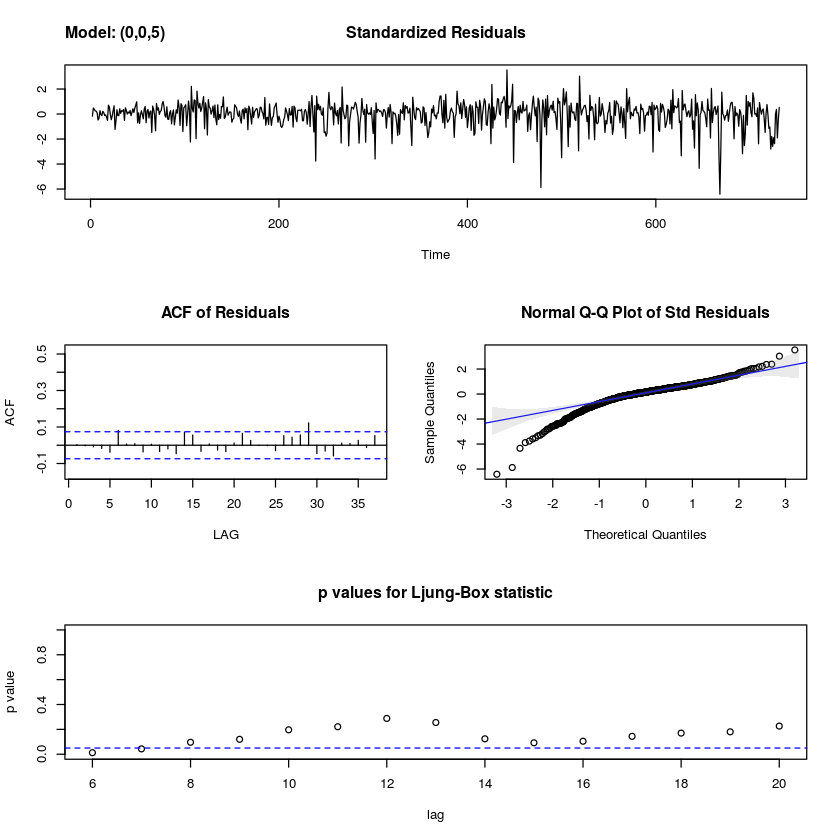

In [34]:
sarima(bike_ts_diff,p=0,d=0,q=5)

#### Normal q-q plots of std residuals

The normal probability plot is a graphical tool for comparing a data set with the normal distribution. We can use it with the standardized residual of the linear regression model and see if the error term ϵ is actually normally distributed. In general, if the points in a q-q plot depart from a straight line, then the assumed distribution is called into question.
The quantiles are more or less your data sorted in ascending order, with various data points labelled as being the point below which a certain proportion of the data fall. In general, Q-Q 

plots take your sample data, sort it in ascending order, and then plot them versus quantiles calculated from a theoretical distribution. Again, if the points in a q-q plot depart from a straight line, then the assumed distribution is called into question.



Ljung-Box statistic 

H0: the errors are independent

H1: the errors are not independent

Let’s check out the model suggested by forecast package


In [29]:
bike_fit_11=auto.arima(bike_ts_diff) #saves R suggestion for the model under bike_fit_11 name


We want to compare AIC for all three models:

AR(1) bike_fit 		12173.89

MA(5) bike_fit_ma5  		12054.62

ARMA(1,1) bike_fit_11 	12049.91  #this one is the lowest


In [30]:
AIC(bike_fit_11)


[1] 12049.91

In [31]:
AIC(bike_fit)


[1] 12173.89

References/textbooks:

Asteriou, D., Hall, S.G., Applied Econometrics, Third edition, palgrave, 2016.

Hamilton, J.D., Time Series Analysis, Princeton University Press, Princeton, New Jersey, 1994. 

Madsen, H., Time Series Analysis, Chapman & Hall/CRC, 2008.

Online tutorials/references:

1. https://onlinecourses.science.psu.edu/stat510/node/33  we are using some of the series/examples from that source.
2. Robert Nau, Duke University, Faqua School of Business: https://people.duke.edu/~rnau/411home.htm
3. http://data.library.virginia.edu/understanding-q-q-plots/ If you want to know more about qq plots


